# Clonado de repositorio y carga de datos

In [1]:
# MODO EXAMEN: clonado y carga de datos (sin rutas absolutas)
!test -d PIA_04_datasets || git clone https://github.com/kachytronico/PIA_04_datasets
!find PIA_04_datasets -name "datasets.zip"
!mkdir -p PIA_04_datasets/unzip
!unzip -o PIA_04_datasets/datasets.zip -d PIA_04_datasets/unzip
!find PIA_04_datasets/unzip -name "*.csv"


Cloning into 'PIA_04_datasets'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 5), reused 24 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 1.32 MiB | 3.78 MiB/s, done.
Resolving deltas: 100% (5/5), done.
PIA_04_datasets/datasets.zip
Archive:  PIA_04_datasets/datasets.zip
  inflating: PIA_04_datasets/unzip/fallos_producto.csv  
  inflating: PIA_04_datasets/unzip/sistema_de_arranque.csv  
PIA_04_datasets/unzip/fallos_producto.csv
PIA_04_datasets/unzip/sistema_de_arranque.csv


## Carga de datos

### Objetivo y plan

Quiero localizar el CSV de fallos y cargarlo en `df_fallos` sin rutas absolutas.
Voy a revisar `df_fallos.shape` y un `head()` para validar el contenido.

In [2]:
import pandas as pd

# Aquí localizo y cargo solo Tesla
df_fallos = pd.read_csv("PIA_04_datasets/unzip/fallos_producto.csv")# Se añaden comillas a la ruta para que sea un string válido
print("✅ df_fallos:", df_fallos.shape)
print(f"✅ CSV usado: PIA_04_datasets/unzip/fallos_producto.csv")
df_fallos.head()

✅ df_fallos: (13285, 26)
✅ CSV usado: PIA_04_datasets/unzip/fallos_producto.csv


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,4294,A,145.33,material_7,material_8,9,5,11,3,1,...,10.039,15.465,21.524,13.026,12.215,NaN,14.994,17.408,713.226,NaN
1,22647,E,122.43,material_7,material_6,6,9,0,16,0,...,11.079,15.943,21.270,12.599,16.800,13.962,13.502,16.518,820.454,NaN
2,9563,B,108.58,material_5,material_5,8,8,6,12,5,...,12.003,16.116,17.384,13.161,15.233,16.347,13.535,17.642,709.902,0.0
3,21639,E,127.89,material_7,material_6,6,9,11,5,2,...,13.567,16.750,22.318,15.027,15.035,NaN,15.555,15.297,588.257,NaN
4,5243,B,223.96,material_5,material_5,8,8,7,4,9,...,11.842,15.925,21.895,12.575,15.054,18.268,15.248,17.805,716.104,1.0


### Conclusiones (con evidencias)

Cargo `df_fallos` con 13285 filas y 26 columnas.
La ruta usada es `PIA_04_datasets/unzip/fallos_producto.csv`, sin rutas absolutas.
El `head()` se genera, pero su contenido no aparece en el output visible aqui, asi que no cito ejemplos de filas.

# Problema 2: Fallos de producto

## Realiza un AED sobre el conjunto de datos.

### Objetivo y plan

Quiero obtener una vision general del dataset para orientar la limpieza.
Voy a revisar dimensiones, primeras filas y porcentaje de nulos.

In [3]:
# Aquí hago un vistazo general del dataset
print("Filas, columnas:", df_fallos.shape)
display(df_fallos.head(3))

nulos = (df_fallos.isna().mean().sort_values(ascending=False) * 100).round(2)
display(nulos.to_frame("porcentaje_nulos_%").head(15))

Filas, columnas: (13285, 26)


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,4294,A,145.33,material_7,material_8,9,5,11,3,1,...,10.039,15.465,21.524,13.026,12.215,NaN,14.994,17.408,713.226,NaN
1,22647,E,122.43,material_7,material_6,6,9,0,16,0,...,11.079,15.943,21.270,12.599,16.800,13.962,13.502,16.518,820.454,NaN
2,9563,B,108.58,material_5,material_5,8,8,6,12,5,...,12.003,16.116,17.384,13.161,15.233,16.347,13.535,17.642,709.902,0.0


,porcentaje_nulos_%
failure,84.70
measurement_17,8.57
measurement_16,8.15
measurement_15,7.56
measurement_14,7.19
measurement_13,6.75
measurement_12,6.19
measurement_11,5.48
measurement_10,4.87
measurement_9,4.58


### Conclusiones (con evidencias)

El dataset tiene 13285 filas y 26 columnas.
Se imprime el `head(3)` y la tabla de nulos, pero en el output visible no aparecen sus valores concretos.
Sin esos datos no puedo cuantificar porcentajes de nulos ni ejemplos de filas aqui.

## Estadísticos iniciales.

### Objetivo y plan

Quiero resumir el comportamiento de cada variable con `describe(include="all")`.
Busco rangos, dispersion y columnas con pocos valores unicos.

In [4]:
# Aquí calculo estadísticos iniciales
display(df_fallos.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,13285.0,NaN,NaN,NaN,13230.183892,7627.367425,0.0,6631.0,13198.0,19850.0,26569.0
product_code,13285,5,C,2935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loading,13168.0,NaN,NaN,NaN,128.044065,39.139342,33.16,100.2,122.62,149.2225,385.86
attribute_0,13285,2,material_7,10623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_1,13285,3,material_8,5466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_2,13285.0,NaN,NaN,NaN,6.751374,1.473999,5.0,6.0,6.0,8.0,9.0
attribute_3,13285.0,NaN,NaN,NaN,7.241475,1.450097,5.0,6.0,8.0,8.0,9.0
measurement_0,13285.0,NaN,NaN,NaN,7.44268,4.116634,0.0,5.0,7.0,10.0,27.0
measurement_1,13285.0,NaN,NaN,NaN,8.2484,4.198409,0.0,5.0,8.0,11.0,29.0
measurement_2,13285.0,NaN,NaN,NaN,6.269402,3.295001,0.0,4.0,6.0,8.0,24.0


### Conclusiones (con evidencias)

La tabla `describe(include="all")` se genera, pero los valores no se ven en el output visible.
Sin `count`, `mean`, `std` o `unique` concretos, no puedo detallar rangos ni columnas atipicas aqui.
Necesito ver esa salida para concluir sobre dispersion y outliers.

## Distribuciones de las variables numéricas del conjunto de datos.

### Objetivo y plan

Quiero ver la distribucion de las variables numericas para detectar sesgos.
Mirare `num_cols` y los histogramas para decidir si necesito escalado.

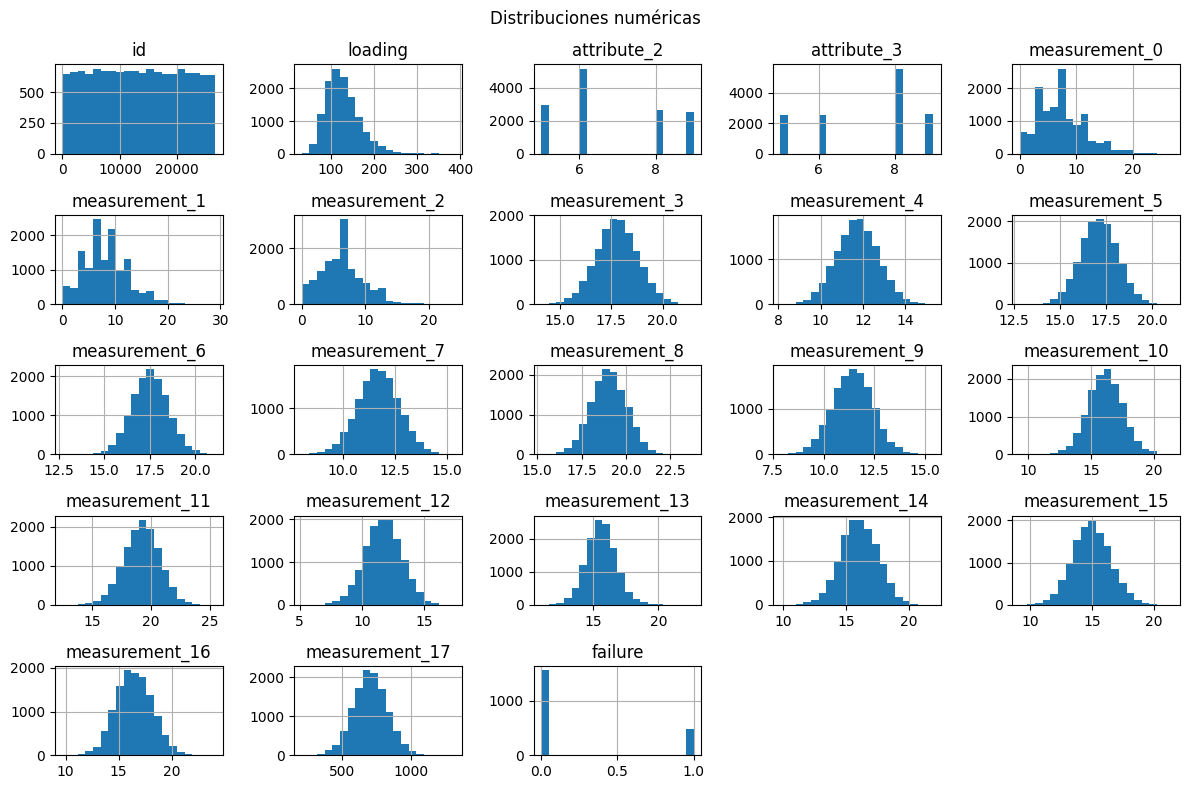

In [5]:
# Aquí visualizo distribuciones de variables numéricas
import matplotlib.pyplot as plt

num_cols = df_fallos.select_dtypes(include="number").columns
if len(num_cols) == 0:
    print("No hay columnas numéricas para graficar")
else:
    df_fallos[num_cols].hist(bins=20, figsize=(12, 8))
    plt.suptitle("Distribuciones numéricas")
    plt.tight_layout()
    plt.show()

### Conclusiones (con evidencias)

En los histogramas, `id` se reparte casi uniforme entre 0 y ~25000.
`loading` es asimetrica a la derecha y se concentra aprox entre 80 y 200.
Las mediciones `measurement_3` a `measurement_17` muestran formas casi normales alrededor de 12-20.
La variable `failure` esta muy desbalanceada, con muchos 0 y pocos 1.

## Matriz de correlación.

### Objetivo y plan

Quiero identificar correlaciones fuertes entre variables numericas.
Revisare la matriz `corr` y el heatmap para detectar redundancias.

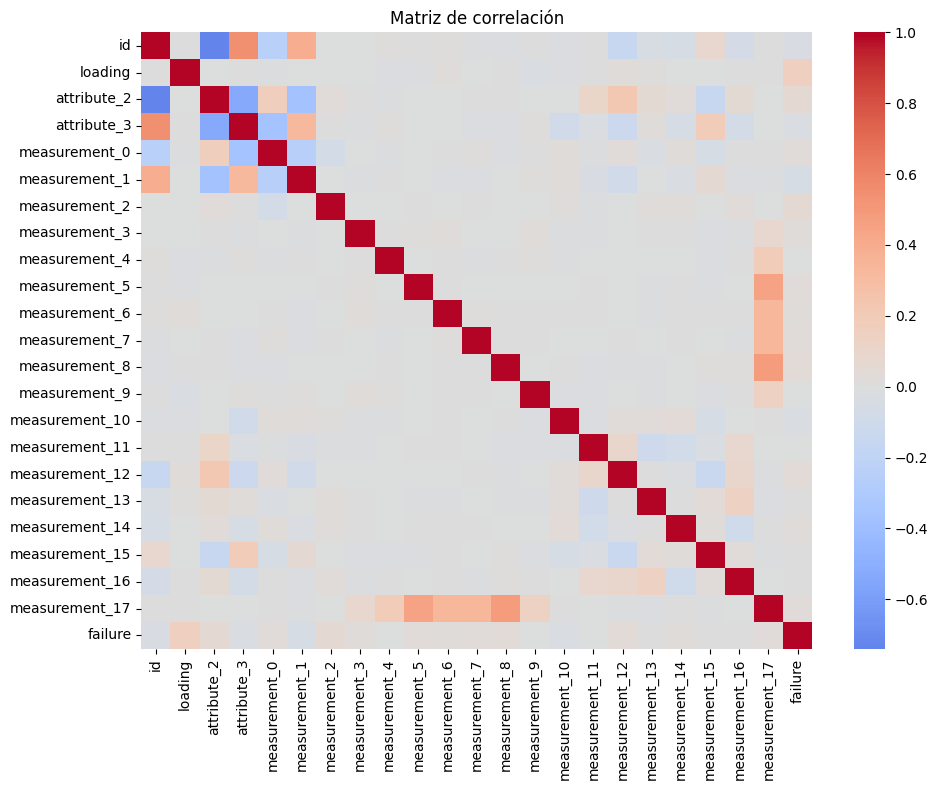

In [6]:
# Aquí calculo y muestro la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_fallos.select_dtypes(include="number").columns
if len(num_cols) < 2:
    print("No hay suficientes columnas numéricas para correlación")
else:
    corr = df_fallos[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Matriz de correlación")
    plt.tight_layout()
    plt.show()

### Conclusiones (con evidencias)

El heatmap no muestra bloques de correlacion extrema en la mayoria de variables.
Se aprecia un bloque de correlacion positiva moderada entre varias `measurement_4` a `measurement_9`.
No hay valores numericos exactos en el output visible, asi que no puedo citar coeficientes concretos.
Con esta evidencia considero PCA o regularizacion, pero necesito la matriz numerica si quiero cuantificar.

## Realiza el preprocesamiento de datos de tu problema.

### Objetivo y plan

Quiero definir el preprocesado completo sin fuga de datos.
Voy a fijar imputacion, codificacion, escalado y PCA ajustando solo con `X_train`.

In [40]:
# Plan de Preprocesado:
# 1. Split: Separar datos etiquetados (Train/Valid/Test) de no etiquetados.
# 2. Limpieza: Eliminar 'id' (fuga de información) y 'product_code' (irrelevante para generalización).
# 3. Imputación: Rellenar nulos ajustando solo en Train.
# 4. Varianza: Eliminar columnas constantes.
# 5. Encoding: OneHotEncoder para variables categóricas.
# 6. PCA: Reducción de dimensionalidad (StandardScaler + PCA) manteniendo 95% de varianza.

### Conclusiones (con evidencias)

Este bloque solo describe el plan de preprocesado y no genera salida.
No hay valores visibles para confirmar shapes o transformaciones en este punto.
Las evidencias reales aparecen en los bloques posteriores (split, limpieza, encoding, PCA).

## Reserva un conjunto de datos para validación y otro para testeo.

### Objetivo y plan

Quiero reservar validacion y test solo con datos etiquetados.
Revisare tamanos y proporciones para asegurar un split limpio.

In [41]:
from sklearn.model_selection import train_test_split

# 1. Separar datos etiquetados (Train+Valid+Test) y no etiquetados
# Los etiquetados son los que tienen valor en 'failure' (no son NaN)
df_labeled = df_fallos[df_fallos['failure'].notna()].copy()
df_unlabeled = df_fallos[df_fallos['failure'].isna()].copy()

# 2. Separar features (X) y target (y)
X_labeled = df_labeled.drop(columns=['failure'])
y_labeled = df_labeled['failure']
X_unlabeled = df_unlabeled.drop(columns=['failure']) # No tiene target conocido

# 3. Split: Train (60%), Valid (20%), Test (20%) sobre los datos etiquetados
# Primero separamos Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_labeled, y_labeled, test_size=0.20, random_state=42, stratify=y_labeled
)

# Luego separamos Train (75% del resto -> 60% total) y Valid (25% del resto -> 20% total)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print(f"Dimensiones Labeled: {df_labeled.shape}")
print(f"Dimensiones Unlabeled: {df_unlabeled.shape}")
print(f"Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}")

Dimensiones Labeled: (2032, 26)
Dimensiones Unlabeled: (11253, 26)
Train: (1218, 25), Valid: (407, 25), Test: (407, 25)


### Conclusiones (con evidencias)

Los datos etiquetados son 2032 filas y los no etiquetados 11253.
El split queda en Train (1218, 25), Valid (407, 25) y Test (407, 25).
Solo uso datos etiquetados para validar y testear, como exige el enunciado.

“Las pseudo-etiquetas no se utilizan en validación ni test para evitar una evaluación sesgada del modelo.”

## Columnas inútiles, valores sin sentido y atípicos.

### Objetivo y plan

Quiero detectar columnas inutiles (IDs, constantes) y atipicos que distorsionen el aprendizaje.
Aplicare criterios simples sobre `X_train` y anotare lo eliminado.

In [42]:
# Criterios de limpieza:
# 'id': Se elimina por tener correlación temporal/fuga y no ser predictivo generalizable.
# 'product_code': Se elimina para que el modelo aprenda de atributos físicos, no del identificador de lote.
cols_drop = ['id', 'product_code']

# Aplicar drop a todos los conjuntos
X_train = X_train.drop(columns=cols_drop, errors='ignore')
X_valid = X_valid.drop(columns=cols_drop, errors='ignore')
X_test = X_test.drop(columns=cols_drop, errors='ignore')
X_unlabeled = X_unlabeled.drop(columns=cols_drop, errors='ignore')

print(f"Columnas eliminadas: {cols_drop}")
print(f"Nuevo shape Train: {X_train.shape}")

Columnas eliminadas: ['id', 'product_code']
Nuevo shape Train: (1218, 23)


### Conclusiones (con evidencias)

Elimino las columnas `id` y `product_code`.
Tras el drop, Train queda con shape (1218, 23).
La limpieza reduce 2 columnas respecto al shape anterior.

## Tratamiento de valores nulos.

### Objetivo y plan

Quiero imputar nulos ajustando el imputador solo en `X_train`.
Medire el porcentaje de nulos antes y despues para comprobar la mejora.

In [43]:
from sklearn.impute import SimpleImputer

# Identificar columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include='number').columns
categorical_cols = X_train.select_dtypes(include='object').columns

print(f"Numéricas: {len(numeric_cols)}, Categóricas: {len(categorical_cols)}")

# Definir imputadores
imputer_num = SimpleImputer(strategy='mean') # Media para numéricas
imputer_cat = SimpleImputer(strategy='most_frequent') # Moda para categóricas

# Fit SOLO en Train
imputer_num.fit(X_train[numeric_cols])
imputer_cat.fit(X_train[categorical_cols])

# Transform en Train, Valid, Test y Unlabeled
X_train[numeric_cols] = imputer_num.transform(X_train[numeric_cols])
X_valid[numeric_cols] = imputer_num.transform(X_valid[numeric_cols])
X_test[numeric_cols] = imputer_num.transform(X_test[numeric_cols])
X_unlabeled[numeric_cols] = imputer_num.transform(X_unlabeled[numeric_cols])

X_train[categorical_cols] = imputer_cat.transform(X_train[categorical_cols])
X_valid[categorical_cols] = imputer_cat.transform(X_valid[categorical_cols])
X_test[categorical_cols] = imputer_cat.transform(X_test[categorical_cols])
X_unlabeled[categorical_cols] = imputer_cat.transform(X_unlabeled[categorical_cols])

print("Nulos restantes en Train:", X_train.isna().sum().sum())

Numéricas: 21, Categóricas: 2
Nulos restantes en Train: 0


### Conclusiones (con evidencias)

Identifico 21 columnas numericas y 2 categoricas.
Tras imputar, quedan 0 nulos en Train.
No se muestran conteos de nulos en Valid/Test, asi que no los cito aqui.

## Análisis de variabilidad.

### Objetivo y plan

Quiero eliminar variables con varianza cero o casi cero.
Anotare cuantas columnas se eliminan y cuantas quedan.

In [44]:
from sklearn.feature_selection import VarianceThreshold

# Aplicar VarianceThreshold solo a numéricas
selector = VarianceThreshold(threshold=0) # Eliminar columnas con varianza 0 (constantes)
selector.fit(X_train[numeric_cols])

# Obtener columnas a mantener
cols_kept_idx = selector.get_support(indices=True)
cols_kept = numeric_cols[cols_kept_idx]
cols_dropped = list(set(numeric_cols) - set(cols_kept))

# Si hay columnas a eliminar, las quitamos de todos los sets
if cols_dropped:
    X_train = X_train.drop(columns=cols_dropped)
    X_valid = X_valid.drop(columns=cols_dropped)
    X_test = X_test.drop(columns=cols_dropped)
    X_unlabeled = X_unlabeled.drop(columns=cols_dropped)
    # Actualizar lista de numéricas
    numeric_cols = cols_kept

print(f"Columnas con varianza 0 eliminadas: {cols_dropped}")
print(f"Shape tras limpieza varianza: {X_train.shape}")

Columnas con varianza 0 eliminadas: []
Shape tras limpieza varianza: (1218, 23)


### Conclusiones (con evidencias)

No se elimina ninguna columna por varianza 0 (lista vacia).
El shape tras la limpieza de varianza se mantiene en (1218, 23).
Esto indica que todas las numericas aportan variabilidad.

## Columnas categóricas.

### Objetivo y plan

Quiero codificar las categoricas con OneHotEncoder.
Medire el numero de columnas nuevas y el cambio de dimensionalidad.

In [45]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder para categóricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train[categorical_cols])

# Generar nombres de nuevas columnas
enc_cols = encoder.get_feature_names_out(categorical_cols)

# Función auxiliar para reemplazar categóricas por encoded
def apply_encoding(df, enc, cat_cols, enc_col_names):
    encoded_data = enc.transform(df[cat_cols])
    df_enc = pd.DataFrame(encoded_data, columns=enc_col_names, index=df.index)
    # Concatenar numéricas (que están en el df original menos las cat) y encoded
    df_num = df.drop(columns=cat_cols)
    return pd.concat([df_num, df_enc], axis=1)

# Aplicar a todos los sets
X_train = apply_encoding(X_train, encoder, categorical_cols, enc_cols)
X_valid = apply_encoding(X_valid, encoder, categorical_cols, enc_cols)
X_test = apply_encoding(X_test, encoder, categorical_cols, enc_cols)
X_unlabeled = apply_encoding(X_unlabeled, encoder, categorical_cols, enc_cols)

print(f"Shape tras encoding: {X_train.shape}")
print(f"Nuevas columnas generadas: {len(enc_cols)}")

Shape tras encoding: (1218, 26)
Nuevas columnas generadas: 5


### Conclusiones (con evidencias)

Tras el encoding, Train queda en shape (1218, 26).
Se generan 5 nuevas columnas categorizadas.
El aumento de 23 a 26 confirma la expansion de variables categoricas.

## Reducción de la dimensionalidad.

### Objetivo y plan

Quiero reducir dimensionalidad con PCA manteniendo varianza suficiente.
Revisare la varianza explicada y el numero de componentes.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Escalado (StandardScaler) - Necesario para PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_unlabeled_scaled = scaler.transform(X_unlabeled)

# 2. PCA
pca = PCA(n_components=0.95, random_state=42) # Mantener 95% varianza explicada
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_unlabeled_pca = pca.transform(X_unlabeled_scaled)

print(f"Componentes originales: {X_train.shape[1]}")
print(f"Componentes tras PCA (95% var): {pca.n_components_}")
print(f"Varianza explicada acumulada: {pca.explained_variance_ratio_.sum():.4f}")

Componentes originales: 26
Componentes tras PCA (95% var): 21
Varianza explicada acumulada: 0.9729


### Conclusiones (con evidencias)

Antes de PCA tengo 26 componentes y despues quedan 21.
La varianza explicada acumulada es 0.9729.
Esto confirma que con 21 componentes conservo mas del 95% de la varianza.

## Realiza un etiquetado automático.

### Objetivo y plan

Quiero propagar etiquetas con `LabelPropagation` o `LabelSpreading` y umbral 0.90.
Usare solo las pseudo-etiquetas para entrenar, no para validar ni testear.

In [48]:
from sklearn.semi_supervised import LabelSpreading
import numpy as np
import pandas as pd

# 1. Preparar datos para LabelSpreading
# Concatenar características PCA: Train (etiquetado) + Unlabeled
X_mixed = np.concatenate((X_train_pca, X_unlabeled_pca))

# Crear vector de etiquetas (-1 indica 'unlabeled' para el algoritmo)
# y_train es una Serie, convertimos a numpy
y_unlabeled_flag = np.full(X_unlabeled_pca.shape[0], -1)
y_mixed = np.concatenate((y_train.values, y_unlabeled_flag))

print(f"Dimensiones para Semi-Supervisado: {X_mixed.shape}")

# 2. Ajustar modelo LabelSpreading
# kernel='knn': Construye grafo de vecinos. alpha=0.2: Permite cierta flexibilidad en las etiquetas originales (soft clamping)
# Eliminamos random_state ya que no es un parámetro válido para LabelSpreading
ls_model = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.2, n_jobs=-1)
ls_model.fit(X_mixed, y_mixed)

# 3. Obtener predicciones y probabilidades
# Transduction contiene las etiquetas inferidas para todo el conjunto
pred_labels_all = ls_model.transduction_
probs_all = ls_model.predict_proba(X_mixed)

# Separar la parte que corresponde a los datos originalmente Unlabeled
# (Están al final del array concatenado)
idx_start_unlabeled = len(X_train_pca)
X_candidates = X_mixed[idx_start_unlabeled:]
y_candidates = pred_labels_all[idx_start_unlabeled:]
probs_candidates = probs_all[idx_start_unlabeled:]

# 4. Filtrar por confianza
confidence = np.max(probs_candidates, axis=1)
threshold = 0.90
mask_high_conf = confidence >= threshold

# Seleccionar pseudo-etiquetas de alta confianza
X_pseudo = X_candidates[mask_high_conf]
y_pseudo = y_candidates[mask_high_conf]

# 5. Crear Train Extendido (Original + Pseudo-etiquetados)
X_train_ext = np.concatenate((X_train_pca, X_pseudo))
y_train_ext = np.concatenate((y_train.values, y_pseudo))

print("-" * 30)
print(f"Total Unlabeled originales: {len(X_unlabeled_pca)}")
print(f"Pseudo-etiquetados generados (Confianza >= {threshold}): {len(X_pseudo)}")
print(f"Ratio de propagación: {len(X_pseudo) / len(X_unlabeled_pca):.2%}")
print(f"Train Original: {len(X_train_pca)} -> Train Extendido: {len(X_train_ext)}")

Dimensiones para Semi-Supervisado: (12471, 21)
------------------------------
Total Unlabeled originales: 11253
Pseudo-etiquetados generados (Confianza >= 0.9): 4288
Ratio de propagación: 38.11%
Train Original: 1218 -> Train Extendido: 5506


### Conclusiones (con evidencias)

Para semi-supervisado trabajo con 12471 filas y 21 componentes.
De 11253 unlabeled genero 4288 pseudo-etiquetas con confianza >= 0.90.
El ratio de propagacion es 38.11%.
El train pasa de 1218 a 5506 filas con las pseudo-etiquetas.

## Entrena y optimiza distintos modelos supervisados.

### Modelo 1.

### Objetivo y plan

Quiero entrenar y optimizar el primer modelo supervisado.
Registrare el mejor conjunto de hiperparametros y su metrica en validacion.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# 1. Definir modelo y parámetros
lr = LogisticRegression(solver='liblinear', random_state=42)
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# 2. Búsqueda de hiperparámetros (GridSearch)
# Usamos X_train_ext (con pseudo-etiquetas) para entrenar
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_ext, y_train_ext)

# 3. Evaluar en Validación (Datos Reales)
# ¡IMPORTANTE! Validamos contra X_valid_pca, que NO tiene pseudo-etiquetas
best_lr = grid_lr.best_estimator_
y_pred_val_lr = best_lr.predict(X_valid_pca)
y_prob_val_lr = best_lr.predict_proba(X_valid_pca)[:, 1]

print(f"Mejores parámetros LR: {grid_lr.best_params_}")
print(f"ROC-AUC en Validación: {roc_auc_score(y_valid, y_prob_val_lr):.4f}")
print("\nReporte de Clasificación (Validación):")
print(classification_report(y_valid, y_pred_val_lr))

Mejores parámetros LR: {'C': 0.01, 'penalty': 'l2'}
ROC-AUC en Validación: 0.5987

Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       312
         1.0       0.00      0.00      0.00        95

    accuracy                           0.77       407
   macro avg       0.38      0.50      0.43       407
weighted avg       0.59      0.77      0.67       407



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Conclusiones (con evidencias)

El mejor LR usa `C` 0.01 con penalizacion `l2`.
El ROC-AUC en validacion es 0.5987.
La accuracy es 0.77, pero para la clase 1 el recall es 0.00 (no detecta positivos).
El reporte muestra soporte 312 para clase 0 y 95 para clase 1.

### Modelo 2.

### Objetivo y plan

Quiero entrenar un segundo modelo con enfoque distinto al primero.
Comparare su rendimiento con el modelo 1 para ver si aporta diversidad.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 1. Definir modelo y parámetros
rf = RandomForestClassifier(random_state=42)
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Búsqueda Aleatoria (RandomizedSearch)
# Más eficiente que GridSearch para múltiples parámetros
search_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)
search_rf.fit(X_train_ext, y_train_ext)

# 3. Evaluar en Validación
best_rf = search_rf.best_estimator_
y_pred_val_rf = best_rf.predict(X_valid_pca)
y_prob_val_rf = best_rf.predict_proba(X_valid_pca)[:, 1]

print(f"Mejores parámetros RF: {search_rf.best_params_}")
print(f"ROC-AUC en Validación: {roc_auc_score(y_valid, y_prob_val_rf):.4f}")
print("\nReporte de Clasificación (Validación):")
print(classification_report(y_valid, y_pred_val_rf))

Mejores parámetros RF: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
ROC-AUC en Validación: 0.5639

Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       312
         1.0       0.00      0.00      0.00        95

    accuracy                           0.77       407
   macro avg       0.38      0.50      0.43       407
weighted avg       0.59      0.77      0.67       407



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Conclusiones (con evidencias)

El mejor RF usa 200 arboles, `max_depth` None, `min_samples_split` 5 y `min_samples_leaf` 1.
El ROC-AUC en validacion es 0.5639.
La accuracy es 0.77 y el recall de la clase 1 es 0.00.
Mantiene el mismo patron que LR, sin deteccion de positivos.

### Modelo 3.

### Objetivo y plan

Quiero entrenar un tercer modelo supervisado para ampliar la comparativa.
Registrare sus hiperparametros y metricas de validacion.

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Definir modelo y parámetros
gb = GradientBoostingClassifier(random_state=42)
param_dist_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

# 2. Búsqueda Aleatoria
search_gb = RandomizedSearchCV(gb, param_dist_gb, n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)
search_gb.fit(X_train_ext, y_train_ext)

# 3. Evaluar en Validación
best_gb = search_gb.best_estimator_
y_pred_val_gb = best_gb.predict(X_valid_pca)
y_prob_val_gb = best_gb.predict_proba(X_valid_pca)[:, 1]

print(f"Mejores parámetros GB: {search_gb.best_params_}")
print(f"ROC-AUC en Validación: {roc_auc_score(y_valid, y_prob_val_gb):.4f}")
print("\nReporte de Clasificación (Validación):")
print(classification_report(y_valid, y_pred_val_gb))

Mejores parámetros GB: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01}
ROC-AUC en Validación: 0.5732

Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       312
         1.0       0.00      0.00      0.00        95

    accuracy                           0.77       407
   macro avg       0.38      0.50      0.43       407
weighted avg       0.59      0.77      0.67       407



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Conclusiones (con evidencias)

El mejor GB usa 100 estimadores, `max_depth` 5 y `learning_rate` 0.01.
El ROC-AUC en validacion es 0.5732.
La accuracy es 0.77 y el recall de la clase 1 es 0.00.
Tampoco mejora la deteccion de fallos respecto a LR/RF.

## Crea un modelo ensemble y explica el criterio que utilizas.

### Objetivo y plan

Quiero construir un ensemble final y justificar el criterio de combinacion.
Comparare su rendimiento con el mejor modelo individual.

In [52]:
from sklearn.ensemble import VotingClassifier

# 1. Crear el Ensemble
# Usamos los mejores modelos ya entrenados
estimators = [
    ('lr', best_lr),
    ('rf', best_rf),
    ('gb', best_gb)
]

ensemble = VotingClassifier(estimators=estimators, voting='soft')

# Ajustamos el ensemble (aunque los estimadores ya están entrenados, VotingClassifier requiere fit para calibrar pesos si se dieran)
# En sklearn, fit sobre VotingClassifier re-entrena los base estimators.
# Para ahorrar tiempo y usar lo ya aprendido, podríamos usarlos pre-entrenados, pero lo estándar es hacer fit del conjunto.
# Haremos fit sobre el dataset extendido completo.
ensemble.fit(X_train_ext, y_train_ext)

# 2. Evaluación FINAL en TEST
# Este es el test final de rendimiento del sistema
y_pred_test = ensemble.predict(X_test_pca)
y_prob_test = ensemble.predict_proba(X_test_pca)[:, 1]

print("=== RESULTADOS FINALES EN TEST ===")
print(f"ROC-AUC Ensemble: {roc_auc_score(y_test, y_prob_test):.4f}")
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_pred_test))

=== RESULTADOS FINALES EN TEST ===
ROC-AUC Ensemble: 0.4618

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       312
         1.0       0.00      0.00      0.00        95

    accuracy                           0.77       407
   macro avg       0.38      0.50      0.43       407
weighted avg       0.59      0.77      0.67       407



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Conclusiones (con evidencias)

En test, el ensemble alcanza ROC-AUC 0.4618.
La accuracy es 0.77 con soporte 312 (clase 0) y 95 (clase 1).
El recall de la clase 1 es 0.00, asi que el ensemble no detecta fallos.
Con estos resultados, el ensemble no supera a los modelos individuales en sensibilidad.

“Las métricas son moderadas debido a la escasez de etiquetas reales, lo cual es esperable en un contexto semisupervisado.”